# (1) 데이터 가져오기
- sklearn.datase의 laod_diabetes에서 데이터 가져오기
- dabetes의 data를 df_x에, target을 df_y에 저장하기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X, df_y = diabetes.data, diabetes.target

# (2) 모델에 입력할 데이터 X 준비하기

In [2]:
import numpy as np

df_X = np.array(df_X)

# (3) 모델에 예측할 데이터 y 준비하기

In [3]:
df_y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state = 160)

# (5) 모델 준비하기

In [5]:
'''
입력 데이터 개수에 맞는 가중치 w와 b를 준비하기 전에 df_X의 shpae이 (442,10)임
10개의 피쳐가 있기에 w1, w2, w3, ... w10까지 존재하고
앞서 편향 b는 상수이기에 하나의 w0으로 생각할 수 있다.
''' 

# 10개의 w와 1개의 b를 생성한다.
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수 구현하기
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 모델 함수 초기 predictions는 

# (6) 손실함수 Loss 정의하기

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    loss = MSE(predictions, y)
    return loss

# (7) 기울기를 구하는 gradient 함수 구현하기

In [7]:
def gradient(X, W, b, y):
    # N : 전체 정답 데이터 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률(learning rate)설정

In [8]:
LEARNING_RATE = 0.001

# (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델 학습하기
- loss값이 충분히 떨어질 때 까지 학습하기
- 입력하는 데이터인 x에 들어가는 특성 컬럼을 빼도 괜챃음

In [9]:
losses = []

for i in range(1, 40001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 4000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 4000 : Loss 5883.0461
Iteration 8000 : Loss 5586.9246
Iteration 12000 : Loss 5327.9288
Iteration 16000 : Loss 5100.9939
Iteration 20000 : Loss 4901.7658
Iteration 24000 : Loss 4726.4982
Iteration 28000 : Loss 4571.9676
Iteration 32000 : Loss 4435.3992
Iteration 36000 : Loss 4314.4042
Iteration 40000 : Loss 4206.9251


# (10) test 데이터에 대한 성능 확인하기

In [10]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(f"x_test loss값 : {mse}")

x_test loss값 : 3655.303830001469


# (11) 정답 데이터와 예측한 데이터 시각화하기

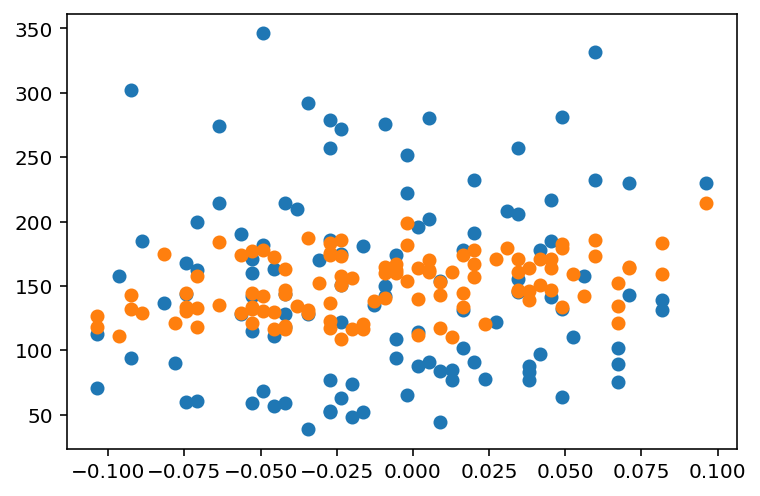

In [11]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 스케일링 작업을 통해 로스값 줄이기

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_X = scaler.fit_transform(diabetes.data)

Iteration 4000 : Loss 3736.4343
Iteration 8000 : Loss 3306.7313
Iteration 12000 : Loss 3113.9614
Iteration 16000 : Loss 3016.8919
Iteration 20000 : Loss 2963.6397
Iteration 24000 : Loss 2932.5667
Iteration 28000 : Loss 2913.6126
Iteration 32000 : Loss 2901.6518
Iteration 36000 : Loss 2893.8878
Iteration 40000 : Loss 2888.7199
x_test loss값 : 2934.9679137314315


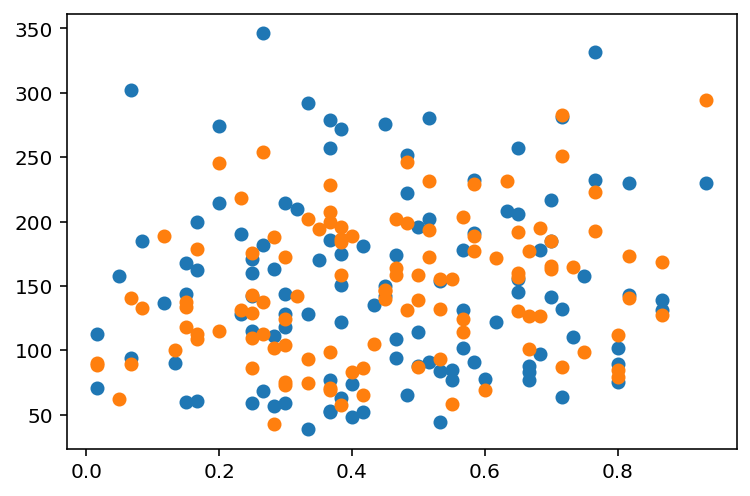

In [13]:
# 모델 X데이터 준비하기
df_X = np.array(df_X)
df_y = np.array(df_y)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state = 160)

# 10개의 w와 1개의 b를 생성한다.
W = np.random.rand(10)
b = np.random.rand()

# 모델 학습하기
losses = []

for i in range(1, 40001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 4000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(f"x_test loss값 : {mse}")

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()